In [2]:
# Imports
import pandas as pd

In [3]:
url = 'https://raw.githubusercontent.com/cesarhcq/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
#pd.read_csv(url)
#pd.read_csv(url, sep=';')
df = pd.read_csv(url, sep=';')
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [4]:
df.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


Qual o valor médio de aluguel por tipo de imóvel?

In [5]:
df_mean_by_type = df.groupby('Tipo')['Valor'] \
          .mean() \
          .reset_index() \
          .sort_values("Valor")
df_mean_by_type

,Tipo,Valor
18,Quitinete,1246.840909
16,Pousada/Chalé,1480.000000
5,Casa de Vila,1574.369478
1,Box/Garagem,1899.756098
19,Studio,2400.000000
12,Loft,2557.882353
8,Flat,4546.189076
0,Apartamento,4744.614648
6,Chácara,4900.000000
2,Casa,6793.454922


<Axes: title={'center': 'Média do valor por Tipo de imóvel'}, xlabel='Tipo'>

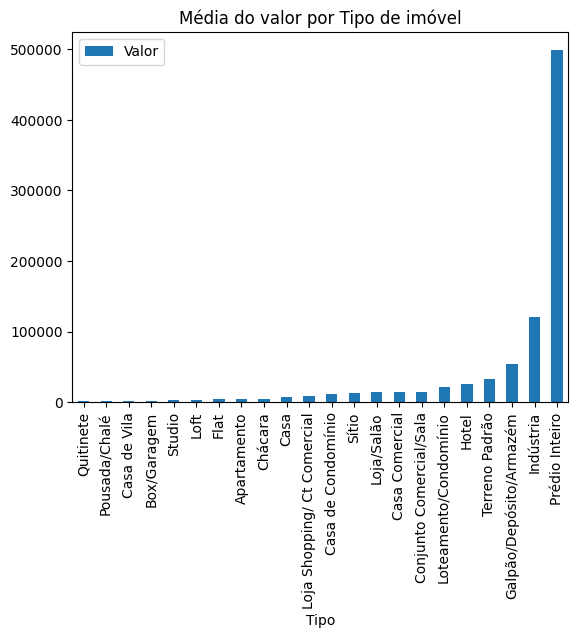

In [7]:
df_mean_by_type.plot(kind='bar', 
                     x="Tipo", 
                     y="Valor",
                     title="Média do valor por Tipo de imóvel")

Removendo os imóveis comerciais

In [8]:
df.Tipo.unique()
list_to_remove = ['Conjunto Comercial/Sala',
                  'Prédio Inteiro',
                  'Galpão/Depósito/Armazém',
                  'Casa Comercial',
                  'Loja Shopping/ Ct Comercial',
                  'Hotel',
                  'Indústria' ]

# First method to filter
#filter_to_remove = [store_type for store_type in df.Tipo.unique() if store_type not in list_to_remove]
#
#df[df.Tipo.isin(filter_to_remove)]

# Second method to filter
#df[~(df.Tipo.isin(list_to_remove))]



<Axes: >

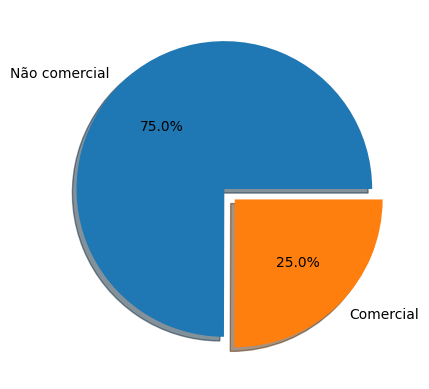

In [9]:
df_removed_types = df[['Tipo']].copy()
df_removed_types['isComercial'] = [ 'Comercial' if x in list_to_remove else 'Não comercial' for x in df['Tipo']]



data = df_removed_types['isComercial'].value_counts()
data.plot.pie(autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], ylabel="")

Qual o percentual de cada tipo de imóvel na nossa base de dados?

<Axes: xlabel='Tipo'>

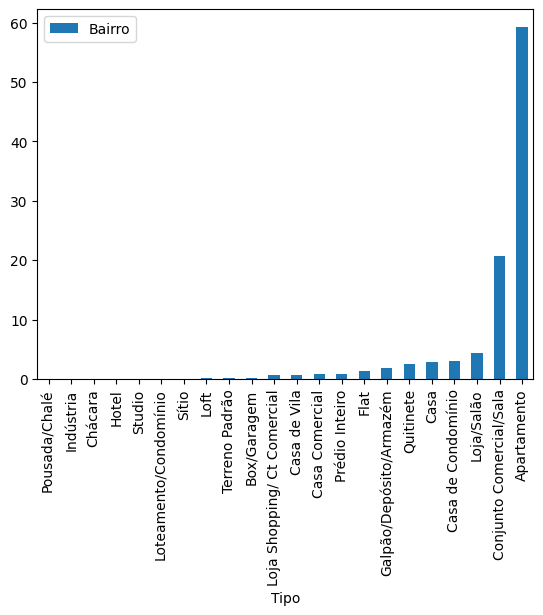

In [11]:
## Aqui plota um funnel chart, porém para essa quantidade de dados, não consegui pensar em um gráfico que consiga plotar bem essas informações,
## porém tem um gráfico de barras, e um funnel chart abaixo.

from plotly import graph_objects as go
import plotly.express as px

df_percentual = df.copy()
df_percentual = df.groupby('Tipo').agg({'Bairro': 'count'})
df_percentual = df_percentual.groupby(level=0, group_keys=False).apply(lambda x:100 * x / float(df_percentual.sum()))
df_percentual = df_percentual.sort_values('Bairro')

df_percentual.plot.bar()


#df_percentual = df.groupby('Tipo')['Bairro'].count().reset_index().sort_values('Bairro', ascending=False)
#df_percentual.Bairro.plot(kind='bar')
#type(df_percentual.Tipo)


#df3 = df2.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

#df_percentual['Porcentagel'] = df.groupby(['Tipo'])['Bairro'].transform(lambda x: x/x.sum())

#fig = px.funnel(df_percentual)

#fig.show()



#fig = go.Figure(data=go.Funnelarea(
#    text=df_percentual.Tipo,
#    values=df_percentual.Bairro
#))
#fig.show()

Selecionando apenas os imóveis do tipo apartamento

In [12]:
only_apartaments = df.copy()

only_apartaments = df[df['Tipo'] == 'Apartamento']
only_apartaments

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Tratando e filtrando os dados

Lidando com dados nulos

In [15]:
def show_missing(df):
    """Return a Pandas dataframe describing the contents of a source dataframe including missing values."""
    
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output

In [22]:
output = show_missing(df)
output

,variable,dtype,count,unique,missing,pc_missing
0,Tipo,object,32960,22,0,0.00
1,Bairro,object,32960,162,0,0.00
2,Quartos,int64,32960,20,0,0.00
3,Vagas,int64,32960,71,0,0.00
4,Suites,int64,32960,15,0,0.00
5,Area,int64,32960,1171,0,0.00
6,Valor,float64,32960,1415,17,0.05
7,Condominio,float64,32960,3812,4093,12.42
8,IPTU,float64,32960,2766,10237,31.06


<Axes: xlabel='variable'>

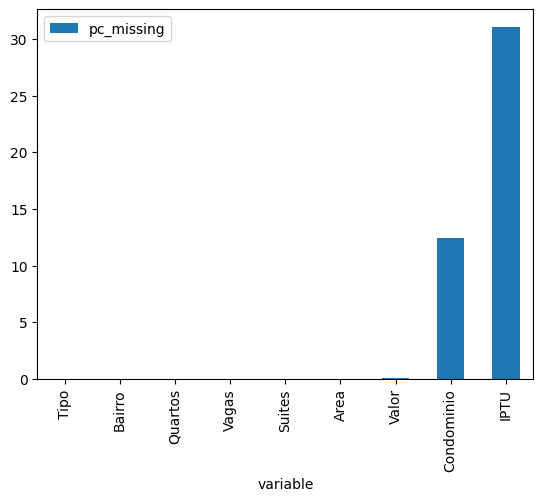

In [23]:
output.plot(kind='bar', x='variable', y='pc_missing')

In [88]:
df_updated = df.copy()
show_missing(df_updated)

,variable,dtype,count,unique,missing,pc_missing
0,Tipo,string,32960,22,0,0.00
1,Bairro,string,32960,162,0,0.00
2,Quartos,int64,32960,20,0,0.00
3,Vagas,int64,32960,71,0,0.00
4,Suites,int64,32960,15,0,0.00
5,Area,int64,32960,1171,0,0.00
6,Valor,float64,32960,1415,17,0.05
7,Condominio,float64,32960,3812,4093,12.42
8,IPTU,float64,32960,2766,10237,31.06


For this analysis, to deal with NaN values, will be puting the mean of the column

In [91]:
df_updated['IPTU'] = df_updated['IPTU'].fillna(df_updated['IPTU'].mean())
df_updated['Condominio'] = df_updated['Condominio'].fillna(df_updated['Condominio'].mean())

show_missing(df_updated)


,variable,dtype,count,unique,missing,pc_missing
0,Tipo,string,32960,22,0,0.00
1,Bairro,string,32960,162,0,0.00
2,Quartos,int64,32960,20,0,0.00
3,Vagas,int64,32960,71,0,0.00
4,Suites,int64,32960,15,0,0.00
5,Area,int64,32960,1171,0,0.00
6,Valor,float64,32960,1415,17,0.05
7,Condominio,float64,32960,3812,0,0.00
8,IPTU,float64,32960,2766,0,0.00


Removendo registros

In [92]:
bool_series = pd.isnull(df_updated['Valor'])

df_updated[bool_series]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
76,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.000000,68.000000
2186,Apartamento,Leme,2,0,0,75,NaN,878.000000,2364.409585
2456,Casa,Campo Grande,3,4,3,363,NaN,2388.062424,2364.409585
2646,Loja/Salão,Barra da Tijuca,0,2,0,80,NaN,2388.062424,2364.409585
2941,Apartamento,Botafogo,2,0,0,95,NaN,1010.000000,170.000000
2973,Apartamento,Copacabana,2,0,0,72,NaN,850.000000,2364.409585
6598,Loja/Salão,Andaraí,0,0,0,326,NaN,2388.062424,1140.000000
7302,Casa,Campo Grande,3,2,1,100,NaN,2388.062424,2364.409585
12683,Apartamento,Leme,2,0,1,75,NaN,878.000000,2364.409585
13229,Apartamento,Glória,3,0,1,135,NaN,910.000000,228.000000


In [93]:
df_updated = df_updated.dropna(subset=['Valor'])

show_missing(df_updated)

,variable,dtype,count,unique,missing,pc_missing
0,Tipo,string,32943,22,0,0.0
1,Bairro,string,32943,162,0,0.0
2,Quartos,int64,32943,20,0,0.0
3,Vagas,int64,32943,71,0,0.0
4,Suites,int64,32943,15,0,0.0
5,Area,int64,32943,1171,0,0.0
6,Valor,float64,32943,1414,0,0.0
7,Condominio,float64,32943,3812,0,0.0
8,IPTU,float64,32943,2766,0,0.0


## Filtros


### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**


In [57]:
df_one_room_less_rent = df.copy()
df_one_room_less_rent.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [62]:
df_one_room_less_rent[(df_one_room_less_rent['Quartos'] == 1) & (df_one_room_less_rent['Valor'] < 1200)]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...,...
32763,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
32818,Quitinete,Flamengo,1,0,0,23,900.0,605.0,NaN
32844,Quitinete,Centro,1,0,0,24,1100.0,323.0,NaN
32859,Casa,Campo Grande,1,0,0,50,600.0,NaN,NaN


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [65]:
df_one_room_less_rent[(df_one_room_less_rent['Quartos'] >= 2) \
                    & (df_one_room_less_rent['Valor'] < 3000) \
                    & (df_one_room_less_rent['Area'] > 70)]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
18,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,NaN
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,NaN
...,...,...,...,...,...,...,...,...,...
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN


## Salvando os dados

In [94]:
import os  
os.makedirs('assets/', exist_ok=True)
df_updated.to_csv('./assets/df_imobiliaria.csv', index=False)

# Manipulando os dados

## Criando colunas numéricas


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


## Criando colunas categóricas


In [80]:
df['Tipo'] = df['Tipo'].astype(dtype='string')
df['Bairro'] = df['Bairro'].astype(dtype='string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  string 
 1   Bairro      32960 non-null  string 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), string(2)
memory usage: 2.3 MB


In [100]:
bool_series = df_updated['Quartos'] == 0

df_updated[bool_series]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por quarto
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.000000,1111.000000,inf
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.000000,3030.000000,inf
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,2388.062424,3563.000000,inf
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.000000,2364.409585,inf
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.000000,2364.409585,inf
...,...,...,...,...,...,...,...,...,...,...
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.000000,496.000000,inf
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.000000,83.000000,inf
32954,Box/Garagem,Centro,0,0,0,755,14000.0,2388.062424,2364.409585,inf
32955,Quitinete,Centro,0,0,0,27,800.0,350.000000,25.000000,inf


## Criando colunas numéricas

In [110]:
#df_updated['Valor por quarto']  = df['Quartos'].apply(lambda x: df_updated['Valor'] / df_updated['Quartos'] if df_updated['Quartos'] != 0 else df_updated['Valor'])
#
#df_updated['Valor por quarto'] = df_updated['Valor'] / df_updated['Quartos'] if df_updated['Quartos'] != 0 else df_updated['Valor']

#df_updated['Valor por quarto'] = [ x['Valor'] / x['Quartos'] if x != 0 else x['Valor'] for x in df_updated ]

# Cria o valor do quarto, caso tenhamos o valor do m² de cada tipo de imovél, podemos plot o valor do quarto por cada imóvel e fazer previsões no fututo.

df_updated.loc[df_updated['Quartos'] == 0, 'Valor por quarto'] = df_updated['Valor']
df_updated.loc[df_updated['Quartos'] != 0, 'Valor por quarto'] = df_updated['Valor'] / df_updated['Quartos'] 
df_updated

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor por quarto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.000000,60.000000,1700.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,2388.062424,2364.409585,3500.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.000000,1111.000000,5200.0
3,Apartamento,Centro,1,0,0,15,800.0,390.000000,20.000000,800.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.000000,2364.409585,800.0
...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.000000,25.000000,800.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.000000,40.000000,600.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.000000,37.000000,700.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.000000,2364.409585,1500.0


## Criando colunas categóricas

<Axes: >

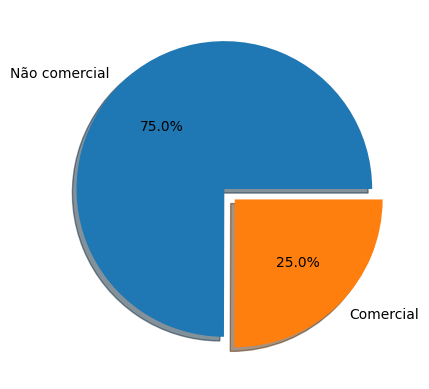

In [111]:
df_removed_types = df[['Tipo']].copy()
df_removed_types['isComercial'] = [ 'Comercial' if x in list_to_remove else 'Não comercial' for x in df['Tipo']]



data = df_removed_types['isComercial'].value_counts()
data.plot.pie(autopct='%1.1f%%', shadow=True, explode=[0.05, 0.05], ylabel="")